## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Unites States Aviation Accident Analysis

## Overview

This is an analysis of aviation accident data from the National Transportation Safety Board (NTSB) to identify trends and patterns in civil aviation accidents and selected incidents in the United States and international waters from 1962 to 2023. The goal of this analysis is to provide insights that can inform safety measures and improve the overall safety of aviation operations.

### Business Problem

The aviation industry faces significant safety risks, and understanding the causes and patterns of accidents is crucial for reducing the likelihood of future incidents. By analyzing historical data on aviation accidents, we can identify common factors and trends that contribute to accidents, enabling the development of targeted safety initiatives to mitigate these risks that lead to loss of lives and financial loss.

### The Data

The dataset from the National Transportation Safety Board which contains information on civil aviation accidents and selected incidents in the United States and international waters from 1962 to 2023. The data includes various features such as the probable cause of the `accident`, `location`, `date` and `details on the aircraft involved.`

In [ ]:
#Importing the relevant libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
# Converting the file into a pd data frame
aviation = '../dsc-phase-1-project-v3/data/Aviation_Data.csv'
df = pd.read_csv(aviation, engine = 'python')


In [26]:
contigency_dataset = df.copy()# copying original data set before cleaning

## Exploring the Data

In [27]:
#Get an Overview of the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [6]:
df.shape

(90348, 31)

In [7]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [8]:
#identifying null values

df.isnull().sum()


Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40216
Airport.Name              37644
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2841
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8555
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7843
Publication.Date          16689
dtype: i

In [9]:
#checking for duplicates 

df.duplicated().sum()

1390

In [10]:
### Data Cleaning

In [11]:
#Drop duplicated items in a column
df = df.drop_duplicates(subset=['Accident.Number'])

In [12]:
#Dropping Unecessary Columns

df.drop(columns = ['Latitude','Longitude','FAR.Description','Investigation.Type','Airport.Code',
'Amateur.Built','Engine.Type','Schedule'],inplace = True )


In [13]:
#Drop rows where 'Country' is not 'United States' and modify the original DataFrame

df = df[df['Country'] == 'United States']


In [29]:
# Convert 'Event.Date' column to Date Time Format
df['Event.Date'] = pd.to_datetime(df['Event.Date'])




In [30]:
#Remove '.' and capitalize the next letter in column names

df = df.rename(columns={col: col.replace('.', ' ').replace(col[col.find('.')+1], col[col.find('.')+1].upper()) for col in df.columns})


In [31]:
df.columns

Index(['Event Id', 'Investigation Type', 'Accident Number', 'Event Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport Code',
       'Airport Name', 'Injury Severity', 'Aircraft Damage',
       'Aircraft Category', 'Registration Number', 'Make', 'Model',
       'Amateur Built', 'Number Of Engines', 'Engine Type', 'FAR Description',
       'Schedule', 'PurpOse Of flight', 'Air Carrier', 'Total Fatal Injuries',
       'Total Serious Injuries', 'Total Minor Injuries', 'Total Uninjured',
       'Weather Condition', 'Broad Phase of flight', 'Report Status',
       'Publication Date'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82230 entries, 0 to 90347
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event Id                82230 non-null  object        
 1   Accident Number         82230 non-null  object        
 2   Event Date              82230 non-null  datetime64[ns]
 3   Location                82219 non-null  object        
 4   Country                 82230 non-null  object        
 5   Airport Name            51556 non-null  object        
 6   Injury Severity         82125 non-null  object        
 7   Aircraft Damage         80253 non-null  object        
 8   Aircraft Category       28137 non-null  object        
 9   Registration Number     82114 non-null  object        
 10  Make                    82209 non-null  object        
 11  Model                   82192 non-null  object        
 12  Number Of Engines       80357 non-null  float64    

In [18]:
# Keep only the rows with at least 18 non-null values
df = df.dropna(thresh=18)

In [19]:
df.shape

(78579, 23)

In [20]:
#final analysis on cleaned data
df.describe()

,Event Date,Number Of Engines,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured
count,78579,77026.000000,70341.000000,70201.000000,70801.00000,75240.000000
mean,1998-08-25 08:41:17.242011136,1.132890,0.395800,0.250937,0.32508,3.942424
min,1948-10-24 00:00:00,0.000000,0.000000,0.000000,0.00000,0.000000
25%,1988-03-29 00:00:00,1.000000,0.000000,0.000000,0.00000,0.000000
50%,1996-07-24 00:00:00,1.000000,0.000000,0.000000,0.00000,1.000000
75%,2008-07-28 00:00:00,1.000000,0.000000,0.000000,0.00000,2.000000
max,2022-12-26 00:00:00,8.000000,230.000000,137.000000,125.00000,699.000000
std,NaN,0.423027,2.172454,1.145059,1.30515,22.516708


In [21]:
# Count accidents by cause and creating another dataset accident_causes_counts


# Filter the DataFrame for rows where 'Report Status' contains 'pilot',Other Crew,Engine Failure,Weather,Runway Condition and manufacturer defects
accident_causes_pilot = df[df['Report Status'].str.contains('pilot', case=False, na=False)]
accident_causes_crew = df[df['Report Status'].str.contains('crew', case=False, na=False)]
accident_causes_engine= df[df['Report Status'].str.contains('engine', case=False, na=False)]
accident_causes_weather= df[df['Report Status'].str.contains('weather', case=False, na=False)]
accident_causes_runway= df[df['Report Status'].str.contains('runway', case=False, na=False)]
accident_causes_manufacturer= df[df['Report Status'].str.contains('manufacturer', case=False, na=False)]
accident_causes_probable= df[df['Report Status'].str.contains('Probable', case=False, na=False)]
accident_causes_foreign= df[df['Report Status'].str.contains('Foreign', case=False, na=False)]
accident_causes_factual= df[df['Report Status'].str.contains('Factual', case=False, na=False)]

# Count the occurrences of each 'Report Status'
accident_causes_pilot_counts = accident_causes_pilot['Report Status'].value_counts()
accident_causes_crew_counts = accident_causes_crew['Report Status'].value_counts()
accident_causes_engine_counts = accident_causes_engine['Report Status'].value_counts()
accident_causes_weather_counts= accident_causes_weather['Report Status'].value_counts()
accident_causes_runway_counts= accident_causes_runway['Report Status'].value_counts()
accident_causes_manufacturer_counts= accident_causes_manufacturer['Report Status'].value_counts()
accident_causes_probable_counts = accident_causes_probable['Report Status'].value_counts()
accident_causes_foreign_counts = accident_causes_foreign['Report Status'].value_counts()
accident_causes_factual_counts = accident_causes_factual['Report Status'].value_counts()

# Combine the counts into a single DataFrame
accident_causes_counts = pd.DataFrame({
    'pilot': accident_causes_pilot_counts,
    'crew': accident_causes_crew_counts,
    'engine': accident_causes_engine_counts,
    'weather': accident_causes_weather_counts,
    'runway': accident_causes_runway_counts,
    'manufacturer': accident_causes_manufacturer_counts,
    'probable': accident_causes_probable_counts,
    'foreign': accident_causes_foreign_counts,
    'factual': accident_causes_factual_counts
    
}).fillna(0).astype(int)
# Reset index to have a clean DataFrame
accident_causes_counts = accident_causes_counts.reset_index().rename(columns={'index': 'Report Status'})

accident_causes_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14849 entries, 0 to 14848
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Report Status  14849 non-null  object
 1   pilot          14849 non-null  int32 
 2   crew           14849 non-null  int32 
 3   engine         14849 non-null  int32 
 4   weather        14849 non-null  int32 
 5   runway         14849 non-null  int32 
 6   manufacturer   14849 non-null  int32 
 7   probable       14849 non-null  int32 
 8   foreign        14849 non-null  int32 
 9   factual        14849 non-null  int32 
dtypes: int32(9), object(1)
memory usage: 638.2+ KB


### Summary of Statistics

Here are the key insights from the final analysis on the cleaned data:**df**

The distinct column(unique identifier) in this dataframe is the `Event Id`

The dataset now contains `80,357` rows after removing duplicates, incomplete cases, and other cleaning steps.

Another data set has been created **accident_causes_counts** this will be used to visualize causal accident trends


In [22]:
# Saving cleaned data to csv(for Tableau visualization later)
df.to_csv('cleaned_aviation.csv',index = False)
accident_causes_counts.to_csv('accident_causes.csv',index = False) 


### Analysis

## Accident Trends by Year
This can help identify if accidents are increasing, decreasing, or staying constant

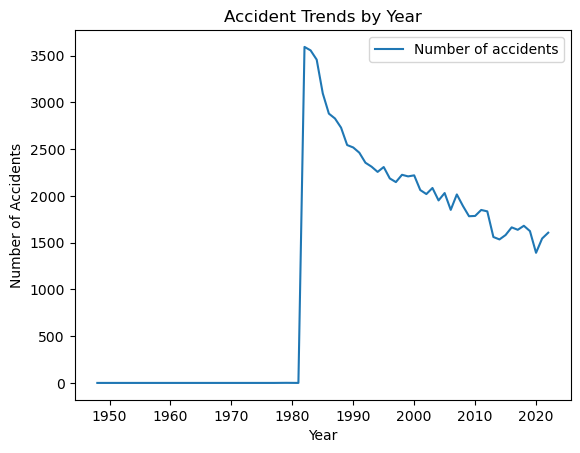

In [32]:
# Extracting year from Date Time Values

df['Year'] = df['Event Date'].dt.year

# Count number of accidents for each year

df_year = df.groupby('Year').size().reset_index(name='Number of accidents')

# Sort by year
df_year = df_year.sort_values('Year')
# Create line plot
df_year.plot(kind='line', x='Year', y='Number of accidents')

# Set title and labels
plt.title('Accident Trends by Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')

# Show plot
plt.show();
